In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score

# Data exploration

In [8]:
PATH = '/Users/juliachakvetadze/Downloads/'

In [9]:
df = pd.read_csv(PATH + 'heart_cleveland_upload.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- condition: 0 = no disease, 1 = disease


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [44]:
# there are more men in train set and they tend to start having problems a bit younger than women
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,96.0,55.750000,9.415553,34.0,49.75,57.0,63.0,76.0
1,201.0,53.965174,8.835371,29.0,47.00,55.0,60.0,77.0


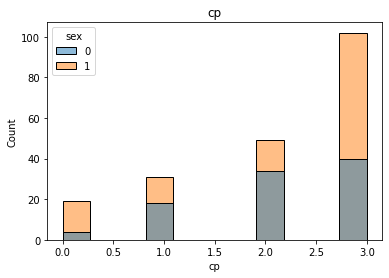

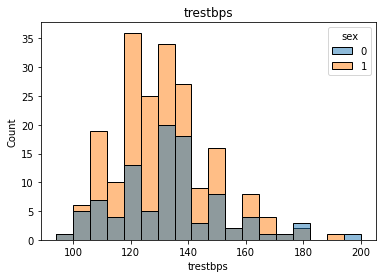

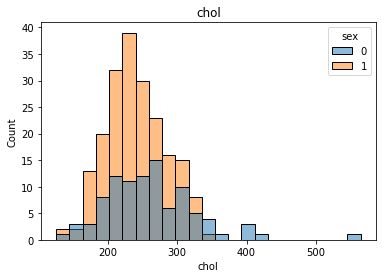

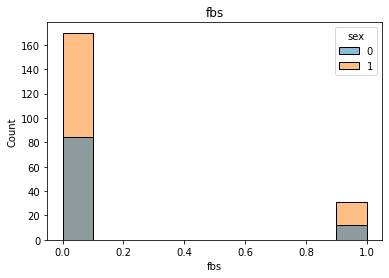

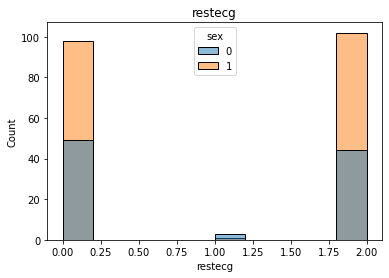

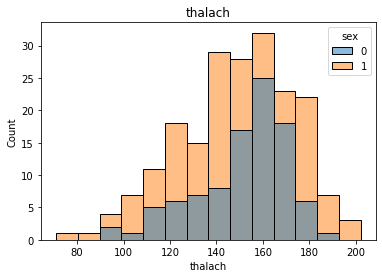

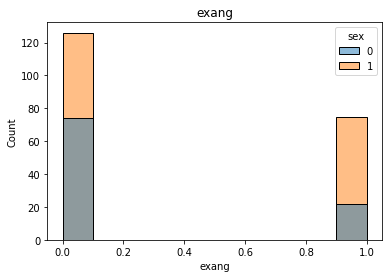

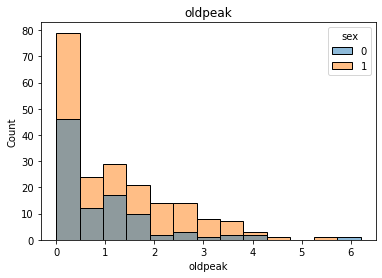

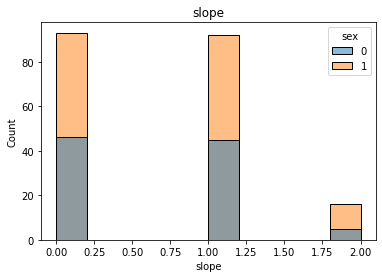

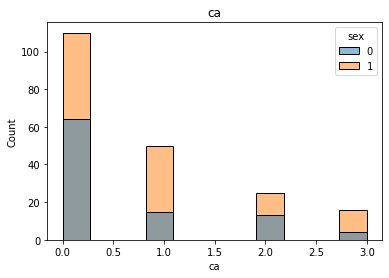

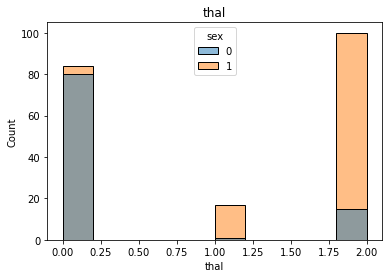

In [43]:
for col in df.columns[2:-1]:
    sns.histplot(data=df, x=col, hue='sex')
    plt.title(col)
    plt.show()

In [14]:
# 26% of female and 55% of male have heart condition
df.groupby('sex')['condition'].value_counts(normalize=True)

sex  condition
0    0            0.739583
     1            0.260417
1    1            0.557214
     0            0.442786
Name: condition, dtype: float64

<AxesSubplot:>

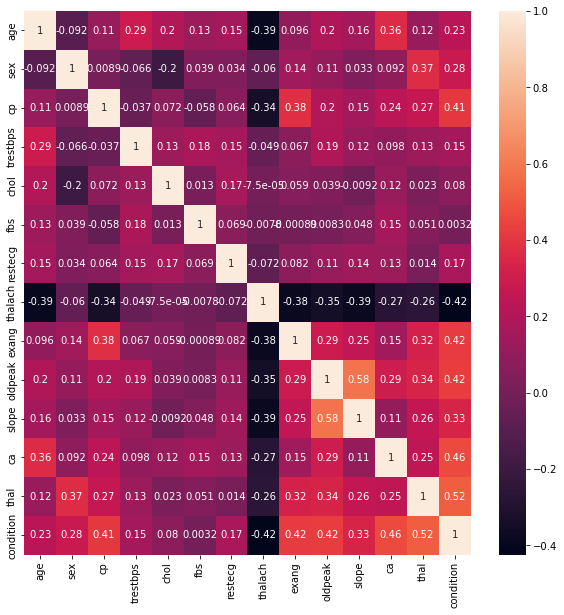

In [18]:
# the highest negative correlation is between condition and maximum heart rate achieved
# the highest positive correlation is between oldpeak and slope, condition and thal
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

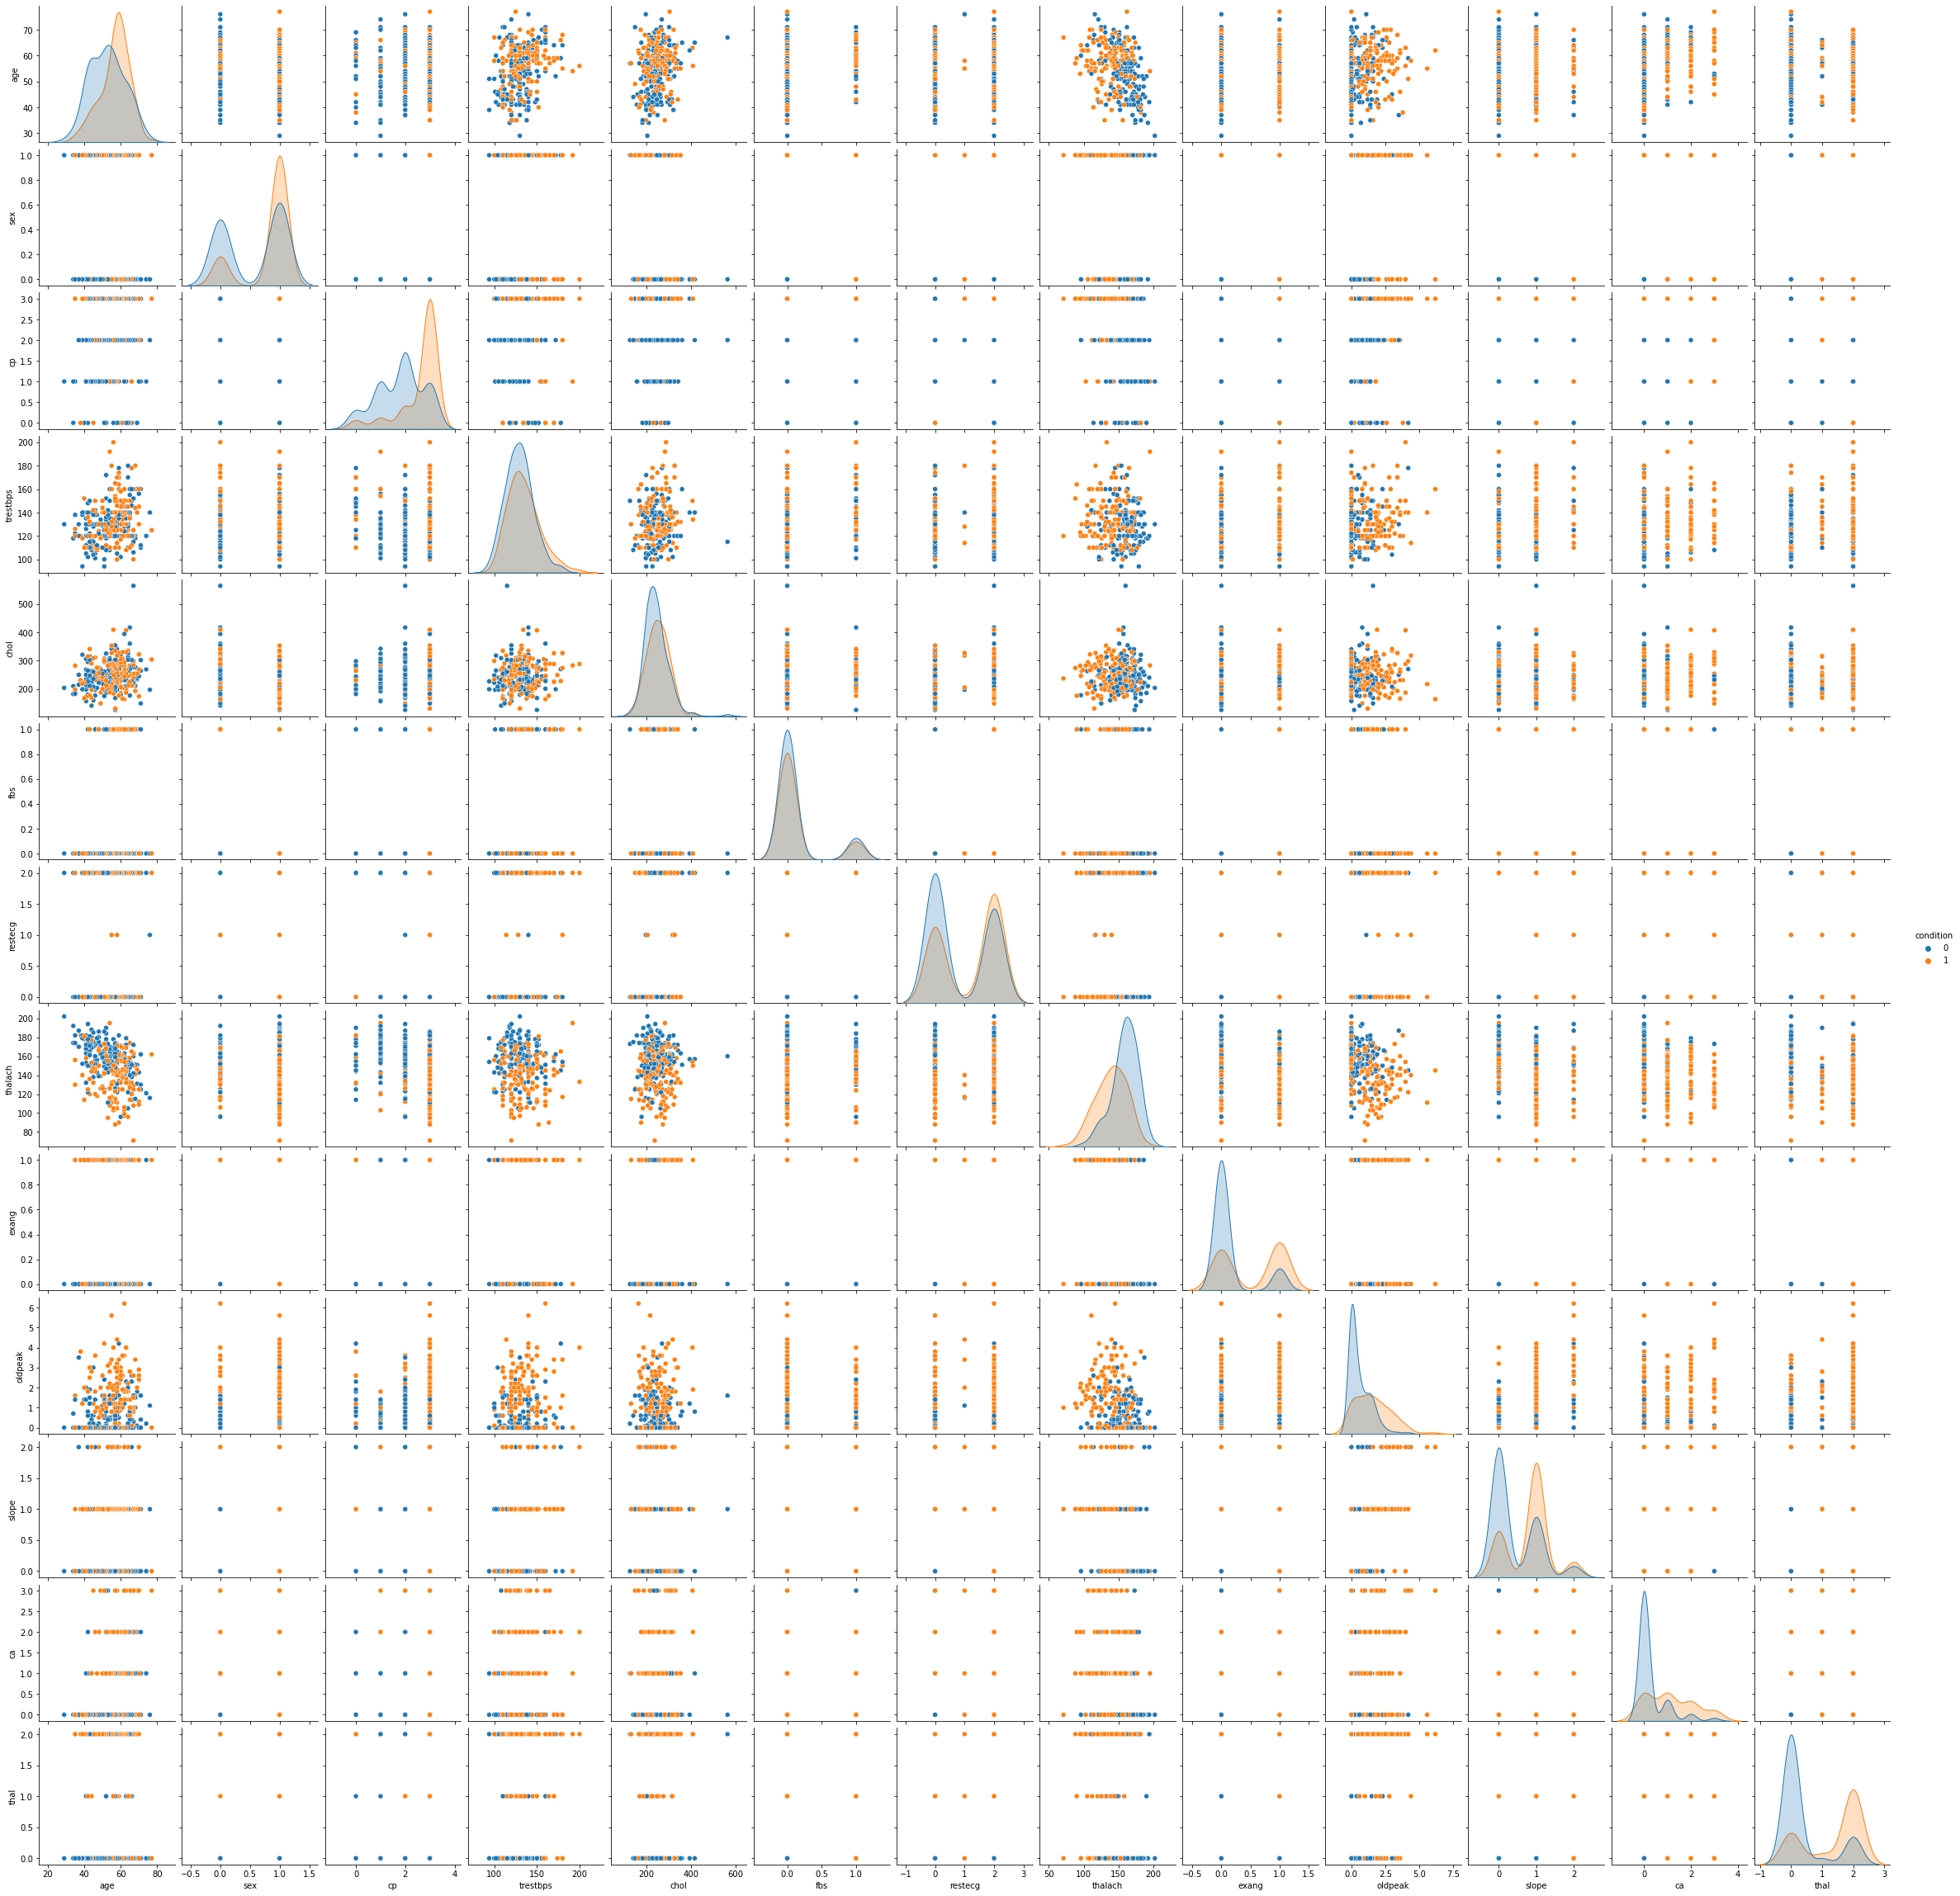

In [47]:
sns.pairplot(df, hue='condition')

# Modeling

In [82]:
def train_test_clf(clf: object, df: pd.DataFrame, normalize: bool) -> Tuple[float, float]:
    X = df.drop('condition', axis=1)
    y = df['condition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
    if normalize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    clf.fit(X_train, y_train)
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    f1_train = f1_score(y_train, train_preds)
    f1_test = f1_score(y_test, test_preds)
    return f1_train, f1_test

## Random forest

In [70]:
# since there are multicollinearity between features I would not try linear models
forest = RandomForestClassifier(max_depth=3, random_state=17)

In [71]:
f1_train_forest, f1_test_forest = train_test_clf(forest, df, False)

In [72]:
f1_train_forest, f1_test_forest

(0.8599999999999999, 0.8727272727272727)

## k Nearest Neighbors

In [83]:
near_neigh = KNeighborsClassifier(n_neighbors=10)

In [84]:
f1_train_neigh, f1_test_neigh = train_test_clf(near_neigh, df, True)

In [85]:
f1_train_neigh, f1_test_neigh

(0.8341708542713567, 0.8363636363636363)

I'll stick with Random Forest, the quality is a bit better